# üèîÔ∏èüö¢Titanic - Machine Learning from Disaster

## ‚¨áÔ∏èImport Packages

In [4]:
using Revise
using Projekt_mlynatom
using DataFrames
using StatsPlots
using Plots
using Flux
using Flux: crossentropy
using Statistics

## Load and visualize train dataset

In [5]:
df = read_csv_to_df("../data/train.csv")

891√ó12 DataFrame
 Row ‚îÇ PassengerId  Survived  Pclass  Name                               Sex   ‚ãØ
     ‚îÇ Int64        Int64     Int64   String                             Strin ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ           1         0       3  Braund, Mr. Owen Harris            male  ‚ãØ
   2 ‚îÇ           2         1       1  Cumings, Mrs. John Bradley (Flor‚Ä¶  femal
   3 ‚îÇ           3         1       3  Heikkinen, Miss. Laina             femal
   4 ‚îÇ           4         1       1  Futrelle, Mrs. Jacques Heath (Li‚Ä¶  femal
   5 ‚îÇ           5         0       3  Allen, Mr. William Henry           male  ‚ãØ
   6 ‚îÇ           6         0       3  Moran, Mr. James                   male
   7 ‚îÇ           7         0       1  McCarthy, Mr. Timothy J            male
   8 ‚îÇ           8         0       3  Palsson, Master. Gosta Leonard     male
  ‚ãÆ  ‚îÇ      ‚ãÆ          ‚ãÆ        ‚ãÆ                     ‚ãÆ                     ‚ãÆ  ‚ã±
 885 ‚îÇ         885         0       3  Sutehall, Mr. Henry Jr             male  ‚ãØ
 886 ‚îÇ         886         0       3  Rice, Mrs. William (Margaret Nor‚Ä¶  femal
 887 ‚îÇ         887         0       2  Montvila, Rev. Juozas              male
 888 ‚îÇ         888         1       1  Graham, Miss. Margaret Edith       femal
 889 ‚îÇ         889         0       3  Johnston, Miss. Catherine Helen ‚Ä¶  femal ‚ãØ
 890 ‚îÇ         890         1       1  Behr, Mr. Karl Howell              male
 891 ‚îÇ         891         0       3  Dooley, Mr. Patrick                male
                                                  8 columns and 876 rows omitted

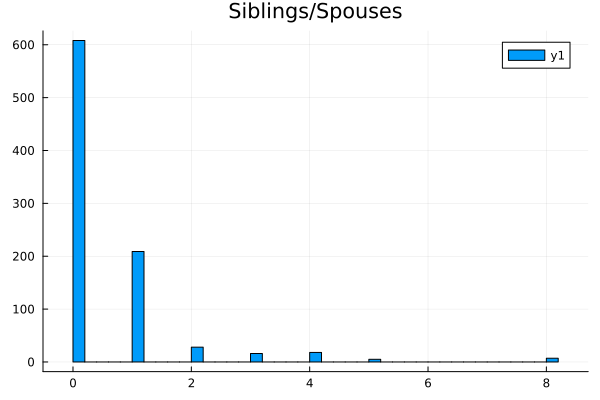

In [4]:
@df df histogram(:SibSp, title="Siblings/Spouses")

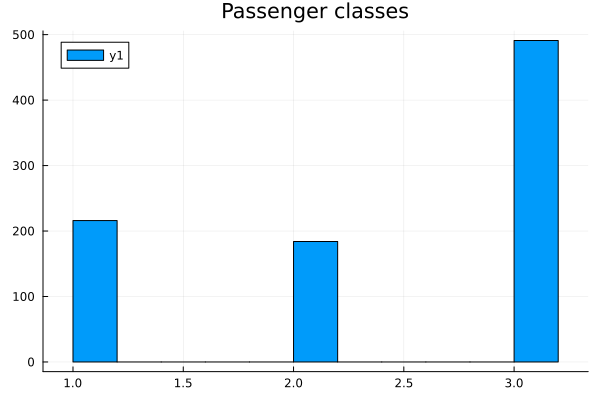

In [7]:
@df df histogram(:Pclass, title="Passenger classes")

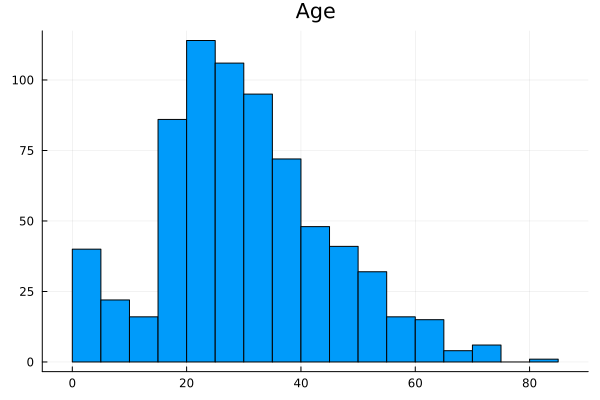

In [8]:
@df df histogram(:Age, title="Age", legend=false)

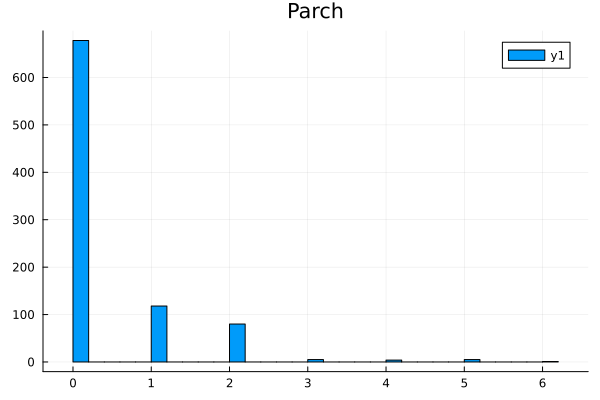

In [9]:
@df df histogram(:Parch, title="Parch")

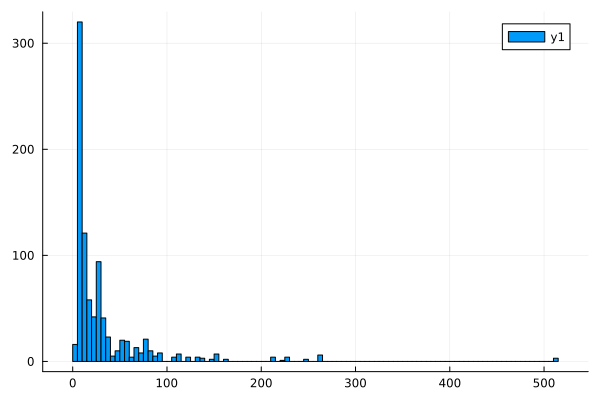

In [10]:
@df df histogram(:Fare)

In [12]:
describe(df)

12√ó7 DataFrame
 Row ‚îÇ variable     mean      min                  median   max                ‚ãØ
     ‚îÇ Symbol       Union‚Ä¶    Any                  Union‚Ä¶   Any                ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ PassengerId  446.0     1                    446.0    891                ‚ãØ
   2 ‚îÇ Survived     0.383838  0                    0.0      1
   3 ‚îÇ Pclass       2.30864   1                    3.0      3
   4 ‚îÇ Name                   Abbing, Mr. Anthony           van Melkebeke, Mr.
   5 ‚îÇ Sex                    female                        male               ‚ãØ
   6 ‚îÇ Age          29.6991   0.42                 28.0     80.0
   7 ‚îÇ SibSp        0.523008  0                    0.0      8
   8 ‚îÇ Parch        0.381594  0                    0.0      6
   9 ‚îÇ Ticket                 110152                        WE/P 5735          ‚ãØ
  10 ‚îÇ Fare         32.2042   0.0                  14.4542  512.329
  11 ‚îÇ Cabin                  A10                           T
  12 ‚îÇ Embarked               C                             S
                                                               3 columns omitted

## Fill missing data in the train dataset

### Missing age

In [6]:
fill_missing_age!(df)

In [7]:
describe(df)

12√ó7 DataFrame
 Row ‚îÇ variable     mean      min                  median   max                ‚ãØ
     ‚îÇ Symbol       Union‚Ä¶    Any                  Union‚Ä¶   Any                ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ PassengerId  446.0     1                    446.0    891                ‚ãØ
   2 ‚îÇ Survived     0.383838  0                    0.0      1
   3 ‚îÇ Pclass       2.30864   1                    3.0      3
   4 ‚îÇ Name                   Abbing, Mr. Anthony           van Melkebeke, Mr.
   5 ‚îÇ Sex                    female                        male               ‚ãØ
   6 ‚îÇ Age          29.3829   0.42                 27.0     80.0
   7 ‚îÇ SibSp        0.523008  0                    0.0      8
   8 ‚îÇ Parch        0.381594  0                    0.0      6
   9 ‚îÇ Ticket                 110152                        WE/P 5735          ‚ãØ
  10 ‚îÇ Fare         32.2042   0.0                  14.4542  512.329
  11 ‚îÇ Cabin                  A10                           T
  12 ‚îÇ Embarked               C                             S
                                                               3 columns omitted

### Missing embarked

count occurences of each ports and select the one with most occurences

In [8]:
count_all(df.Embarked)

Dict{Any, Any} with 4 entries:
  :Q       => 77
  :S       => 644
  :missing => 2
  :C       => 168

In [9]:
fill_missing_embarked!(df, "S")

In [10]:
describe(df)

12√ó7 DataFrame
 Row ‚îÇ variable     mean      min                  median   max                ‚ãØ
     ‚îÇ Symbol       Union‚Ä¶    Any                  Union‚Ä¶   Any                ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ PassengerId  446.0     1                    446.0    891                ‚ãØ
   2 ‚îÇ Survived     0.383838  0                    0.0      1
   3 ‚îÇ Pclass       2.30864   1                    3.0      3
   4 ‚îÇ Name                   Abbing, Mr. Anthony           van Melkebeke, Mr.
   5 ‚îÇ Sex                    female                        male               ‚ãØ
   6 ‚îÇ Age          29.3829   0.42                 27.0     80.0
   7 ‚îÇ SibSp        0.523008  0                    0.0      8
   8 ‚îÇ Parch        0.381594  0                    0.0      6
   9 ‚îÇ Ticket                 110152                        WE/P 5735          ‚ãØ
  10 ‚îÇ Fare         32.2042   0.0                  14.4542  512.329
  11 ‚îÇ Cabin                  A10                           T
  12 ‚îÇ Embarked               C                             S
                                                               3 columns omitted

### Create titles

In [11]:
least_occuring_titles = ["Countess.", "Sir.", "Lady.", "Mlle.", "Mme.", "Don.", "Jonkheer.", "Capt.", "Major.", "Dona."]
add_titles!(df, least_occuring_titles)

In [12]:
describe(df)

13√ó7 DataFrame
 Row ‚îÇ variable     mean      min                  median   max                ‚ãØ
     ‚îÇ Symbol       Union‚Ä¶    Any                  Union‚Ä¶   Any                ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ PassengerId  446.0     1                    446.0    891                ‚ãØ
   2 ‚îÇ Survived     0.383838  0                    0.0      1
   3 ‚îÇ Pclass       2.30864   1                    3.0      3
   4 ‚îÇ Name                   Abbing, Mr. Anthony           van Melkebeke, Mr.
   5 ‚îÇ Sex                    female                        male               ‚ãØ
   6 ‚îÇ Age          29.3829   0.42                 27.0     80.0
   7 ‚îÇ SibSp        0.523008  0                    0.0      8
   8 ‚îÇ Parch        0.381594  0                    0.0      6
   9 ‚îÇ Ticket                 110152                        WE/P 5735          ‚ãØ
  10 ‚îÇ Fare         32.2042   0.0                  14.4542  512.329
  11 ‚îÇ Cabin                  A10                           T
  12 ‚îÇ Embarked               C                             S
  13 ‚îÇ Titles                 Col.                          Rev.               ‚ãØ
                                                               3 columns omitted

In [13]:
unique_titles = count_all(df.Titles)

Dict{Any, Any} with 9 entries:
  Symbol("Mrs.")    => 125
  Symbol("Dr.")     => 7
  Symbol("Ms.")     => 1
  Symbol("Mr.")     => 517
  Symbol("Rev.")    => 6
  Symbol("Rare.")   => 11
  Symbol("Col.")    => 2
  Symbol("Master.") => 40
  Symbol("Miss.")   => 182

## Prepare training data

In [14]:
dummy_cols = [:Sex, :Pclass, :Embarked, :Titles]
X_cols = [:Age, :SibSp, :Parch, :Fare]
X, y = prepare_data(df, dummy_cols, X_cols, :Survived)

(Float32[22.0 1.0 ‚Ä¶ 0.0 0.0; 38.0 1.0 ‚Ä¶ 0.0 0.0; ‚Ä¶ ; 26.0 0.0 ‚Ä¶ 0.0 0.0; 32.0 0.0 ‚Ä¶ 0.0 0.0], [0, 1, 1, 1, 0, 0, 0, 0, 1, 1  ‚Ä¶  0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

## Load and visualize test data

In [15]:
df_test = read_csv_to_df("../data/test.csv")

418√ó11 DataFrame
 Row ‚îÇ PassengerId  Pclass  Name                               Sex      Age    ‚ãØ
     ‚îÇ Int64        Int64   String                             String7  Float6 ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ         892       3  Kelly, Mr. James                   male          3 ‚ãØ
   2 ‚îÇ         893       3  Wilkes, Mrs. James (Ellen Needs)   female        4
   3 ‚îÇ         894       2  Myles, Mr. Thomas Francis          male          6
   4 ‚îÇ         895       3  Wirz, Mr. Albert                   male          2
   5 ‚îÇ         896       3  Hirvonen, Mrs. Alexander (Helga ‚Ä¶  female        2 ‚ãØ
   6 ‚îÇ         897       3  Svensson, Mr. Johan Cervin         male          1
   7 ‚îÇ         898       3  Connolly, Miss. Kate               female        3
   8 ‚îÇ         899       2  Caldwell, Mr. Albert Francis       male          2
  ‚ãÆ  ‚îÇ      ‚ãÆ         ‚ãÆ                     ‚ãÆ                     ‚ãÆ         ‚ãÆ  ‚ã±
 412 ‚îÇ        1303       1  Minahan, Mrs. William Edward (Li‚Ä¶  female        3 ‚ãØ
 413 ‚îÇ        1304       3  Henriksson, Miss. Jenny Lovisa     female        2
 414 ‚îÇ        1305       3  Spector, Mr. Woolf                 male     missin
 415 ‚îÇ        1306       1  Oliva y Ocana, Dona. Fermina       female        3
 416 ‚îÇ        1307       3  Saether, Mr. Simon Sivertsen       male          3 ‚ãØ
 417 ‚îÇ        1308       3  Ware, Mr. Frederick                male     missin
 418 ‚îÇ        1309       3  Peter, Master. Michael J           male     missin
                                                  7 columns and 403 rows omitted

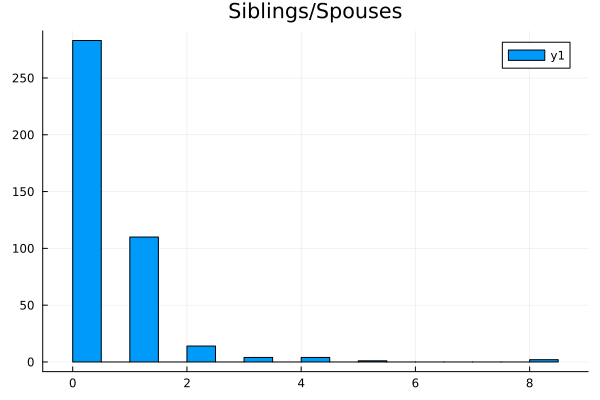

In [30]:
@df df_test histogram(:SibSp, title="Siblings/Spouses")

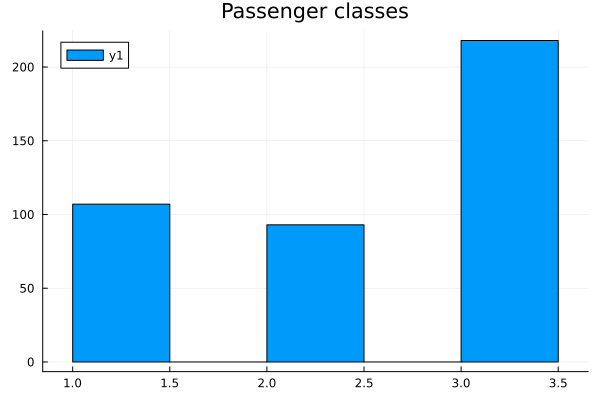

In [29]:
@df df_test histogram(:Pclass, title="Passenger classes")

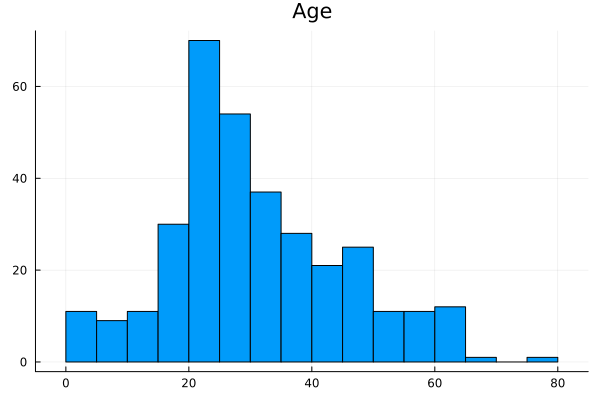

In [31]:
@df df_test histogram(:Age, title="Age", legend=false)

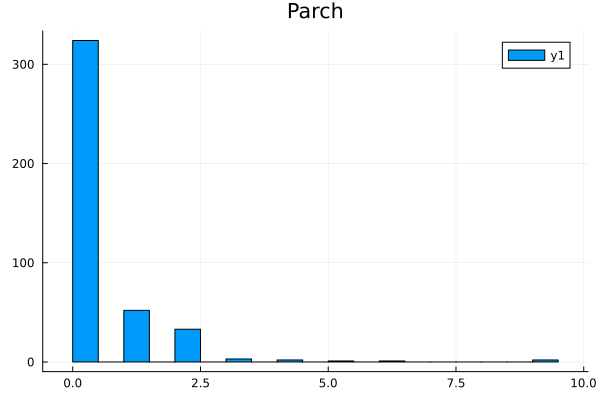

In [32]:
@df df_test histogram(:Parch, title="Parch")

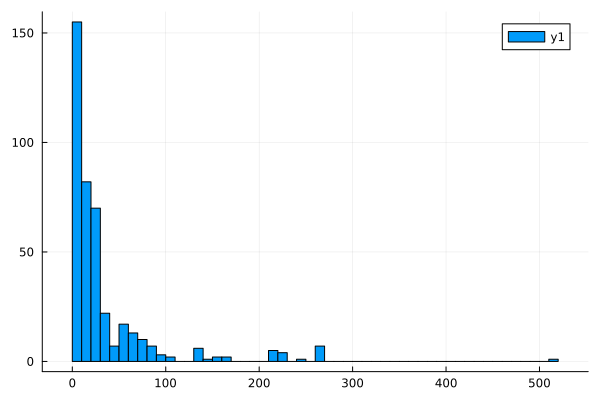

In [33]:
@df df_test histogram(:Fare)

In [26]:
describe(df_test)

11√ó7 DataFrame
 Row ‚îÇ variable     mean      min                            median   max      ‚ãØ
     ‚îÇ Symbol       Union‚Ä¶    Any                            Union‚Ä¶   Any      ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ PassengerId  1100.5    892                            1100.5   1309     ‚ãØ
   2 ‚îÇ Pclass       2.26555   1                              3.0      3
   3 ‚îÇ Name                   Abbott, Master. Eugene Joseph           van Bill
   4 ‚îÇ Sex                    female                                  male
   5 ‚îÇ Age          30.2726   0.17                           27.0     76.0     ‚ãØ
   6 ‚îÇ SibSp        0.447368  0                              0.0      8
   7 ‚îÇ Parch        0.392344  0                              0.0      9
   8 ‚îÇ Ticket                 110469                                  W.E.P. 5
   9 ‚îÇ Fare         35.6272   0.0                            14.4542  512.329  ‚ãØ
  10 ‚îÇ Cabin                  A11                                     G6
  11 ‚îÇ Embarked               C                                       S
                                                               3 columns omitted

## Fill missing data in the test dataset

### Missing fare

In [16]:
findall(.!completecases(df_test, :Fare))

1-element Vector{Int64}:
 153

with missing fare -> Embarked: S, Pclass: 3 -> Fare -> mean

In [17]:
df_test[153, :]

DataFrameRow
 Row ‚îÇ PassengerId  Pclass  Name                Sex      Age       SibSp  Parc ‚ãØ
     ‚îÇ Int64        Int64   String              String7  Float64?  Int64  Int6 ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
 153 ‚îÇ        1044       3  Storey, Mr. Thomas  male         60.5      0       ‚ãØ
                                                               5 columns omitted

In [18]:
fare_mean = compute_fare_mean("S", 3, df_test)

13.913029787234045

In [19]:
df_test[153, :Fare] = fare_mean

13.913029787234045

In [20]:
describe(df_test)

11√ó7 DataFrame
 Row ‚îÇ variable     mean      min                            median   max      ‚ãØ
     ‚îÇ Symbol       Union‚Ä¶    Any                            Union‚Ä¶   Any      ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ PassengerId  1100.5    892                            1100.5   1309     ‚ãØ
   2 ‚îÇ Pclass       2.26555   1                              3.0      3
   3 ‚îÇ Name                   Abbott, Master. Eugene Joseph           van Bill
   4 ‚îÇ Sex                    female                                  male
   5 ‚îÇ Age          30.2726   0.17                           27.0     76.0     ‚ãØ
   6 ‚îÇ SibSp        0.447368  0                              0.0      8
   7 ‚îÇ Parch        0.392344  0                              0.0      9
   8 ‚îÇ Ticket                 110469                                  W.E.P. 5
   9 ‚îÇ Fare         35.5752   0.0                            14.4542  512.329  ‚ãØ
  10 ‚îÇ Cabin                  A11                                     G6
  11 ‚îÇ Embarked               C                                       S
                                                               3 columns omitted

### Missing age

In [21]:
fill_missing_age!(df_test)

In [22]:
describe(df_test)

11√ó7 DataFrame
 Row ‚îÇ variable     mean      min                            median   max      ‚ãØ
     ‚îÇ Symbol       Union‚Ä¶    Any                            Union‚Ä¶   Any      ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ PassengerId  1100.5    892                            1100.5   1309     ‚ãØ
   2 ‚îÇ Pclass       2.26555   1                              3.0      3
   3 ‚îÇ Name                   Abbott, Master. Eugene Joseph           van Bill
   4 ‚îÇ Sex                    female                                  male
   5 ‚îÇ Age          29.4821   0.17                           25.0     76.0     ‚ãØ
   6 ‚îÇ SibSp        0.447368  0                              0.0      8
   7 ‚îÇ Parch        0.392344  0                              0.0      9
   8 ‚îÇ Ticket                 110469                                  W.E.P. 5
   9 ‚îÇ Fare         35.5752   0.0                            14.4542  512.329  ‚ãØ
  10 ‚îÇ Cabin                  A11                                     G6
  11 ‚îÇ Embarked               C                                       S
                                                               3 columns omitted

### Add titles

In [23]:
add_titles!(df_test, least_occuring_titles)

In [24]:
describe(df_test)

12√ó7 DataFrame
 Row ‚îÇ variable     mean      min                            median   max      ‚ãØ
     ‚îÇ Symbol       Union‚Ä¶    Any                            Union‚Ä¶   Any      ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ PassengerId  1100.5    892                            1100.5   1309     ‚ãØ
   2 ‚îÇ Pclass       2.26555   1                              3.0      3
   3 ‚îÇ Name                   Abbott, Master. Eugene Joseph           van Bill
   4 ‚îÇ Sex                    female                                  male
   5 ‚îÇ Age          29.4821   0.17                           25.0     76.0     ‚ãØ
   6 ‚îÇ SibSp        0.447368  0                              0.0      8
   7 ‚îÇ Parch        0.392344  0                              0.0      9
   8 ‚îÇ Ticket                 110469                                  W.E.P. 5
   9 ‚îÇ Fare         35.5752   0.0                            14.4542  512.329  ‚ãØ
  10 ‚îÇ Cabin                  A11                                     G6
  11 ‚îÇ Embarked               C                                       S
  12 ‚îÇ Titles                 Col.                                    Rev.
                                                               3 columns omitted

In [25]:
count_all(df_test.Titles)

Dict{Any, Any} with 9 entries:
  Symbol("Mrs.")    => 72
  Symbol("Dr.")     => 1
  Symbol("Ms.")     => 1
  Symbol("Mr.")     => 240
  Symbol("Rev.")    => 2
  Symbol("Rare.")   => 1
  Symbol("Col.")    => 2
  Symbol("Master.") => 21
  Symbol("Miss.")   => 78

## Prepare test data

In [26]:
X_test = prepare_data(df_test, dummy_cols, X_cols)

418√ó17 Matrix{Float32}:
 34.5  0.0  0.0    7.8292  0.0  0.0  ‚Ä¶  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 47.0  1.0  0.0    7.0     1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 62.0  0.0  0.0    9.6875  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 27.0  0.0  0.0    8.6625  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 22.0  1.0  1.0   12.2875  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 14.0  0.0  0.0    9.225   0.0  0.0  ‚Ä¶  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 30.0  0.0  0.0    7.6292  1.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 26.0  1.0  1.0   29.0     0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 18.0  0.0  0.0    7.2292  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 21.0  2.0  0.0   24.15    0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  ‚ãÆ                             ‚ãÆ    ‚ã±  ‚ãÆ                        ‚ãÆ    
  3.0  1.0  1.0   13.775   1.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 23.0  0.0  0.0    7.75    1.0  0.0  ‚Ä¶  1.0  0.0  0.0  0.0  0.0  0.0  0.0


## üìà Logistic regression

### standardize

In [27]:
X_stand = standardize(X; dims=1)
X_log = hcat(X_stand, ones(size(X, 1)))

891√ó18 Matrix{Float64}:
 -0.556769   0.43255   -0.473408  -0.502163   ‚Ä¶  -0.0335013  -0.0474046  1.0
  0.649843   0.43255   -0.473408   0.786404      -0.0335013  -0.0474046  1.0
 -0.255116  -0.474279  -0.473408  -0.48858       -0.0335013  -0.0474046  1.0
  0.423603   0.43255   -0.473408   0.420494      -0.0335013  -0.0474046  1.0
  0.423603  -0.474279  -0.473408  -0.486064      -0.0335013  -0.0474046  1.0
 -0.179703  -0.474279  -0.473408  -0.477848   ‚Ä¶  -0.0335013  -0.0474046  1.0
  1.85646   -0.474279  -0.473408   0.395591      -0.0335013  -0.0474046  1.0
 -2.06503    2.24621    0.767199  -0.223957      -0.0335013  -0.0474046  1.0
 -0.179703  -0.474279   2.0078    -0.424018      -0.0335013  -0.0474046  1.0
 -1.16008    0.43255   -0.473408  -0.0429314     -0.0335013  -0.0474046  1.0
  ‚ãÆ                                           ‚ã±   ‚ãÆ                      
 -0.556769  -0.474279  -0.473408  -0.436426      -0.0335013  -0.0474046  1.0
 -0.104289  -0.474279  -0.473408  -0.436762 

### Split dataset

In [28]:
X_log_train, y_log_train, X_log_dev, y_log_dev = split_dataset(X_log, y)

([0.8760828971862793 -0.4742787480354309 ‚Ä¶ -0.04740458354353905 1.0; -2.0650341510772705 3.1530375480651855 ‚Ä¶ -0.04740458354353905 1.0; ‚Ä¶ ; 0.04653707146644592 -0.4742787480354309 ‚Ä¶ -0.04740458354353905 1.0; 0.5744298696517944 0.4325503408908844 ‚Ä¶ -0.04740458354353905 1.0], [0, 0, 1, 0, 1, 0, 0, 0, 1, 1  ‚Ä¶  0, 0, 1, 0, 0, 1, 1, 1, 0, 0], [-0.40594246983528137 1.3393794298171997 ‚Ä¶ -0.04740458354353905 1.0; 0.04653707146644592 -0.4742787480354309 ‚Ä¶ -0.04740458354353905 1.0; ‚Ä¶ ; -0.5567689538002014 -0.4742787480354309 ‚Ä¶ -0.04740458354353905 1.0; -0.7830087542533875 -0.4742787480354309 ‚Ä¶ -0.04740458354353905 1.0], [1, 1, 0, 1, 1, 1, 1, 0, 1, 0  ‚Ä¶  0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

### define steps

In [29]:
w_size = size(X_log_train, 2)
step_gd = GD(0.001)


GD(0.001)

### find best $\lambda$

In [30]:
best_Œª = get_best_Œª(X_log_train, y_log_train, X_log_dev, y_log_dev, step_gd)

0.0

### compute regression

In [96]:
w = logistic_regression(X_log_train, y_log_train, step_gd; max_iter = 100000, Œª=0)

18-element Vector{Float64}:
 -0.45564829125468115
 -0.6537872034629212
 -0.30174014017544254
  0.20928534293732293
  0.9490938862353814
  0.9639284364420779
  0.47441882644493766
  0.13684793700675912
  0.05937712634397195
  0.6164382629376461
  0.3454693569839933
  0.706589065699397
  0.05130243924310983
 -0.2217352704609663
  0.033611210123810895
  0.1416414804845189
  0.04409039528837849
 -0.6727947322536211

In [35]:
step_adam = Adam_s(0.001, 0.9, 0.999, 1e-8, zeros(w_size), zeros(w_size))
w = logistic_regression(X_log_train, y_log_train, step_adam; max_iter = 10000, Œª=0)

18-element Vector{Float64}:
 -0.39595968665584474
 -0.6406187769656483
 -0.28872650492683855
  0.1567918540119372
  1.7229874500186508
  1.0013059869631566
  0.46848310660119097
  0.1462671348815054
  0.033116215683945634
  0.04845120262028586
 -0.2549347702888339
  0.7543772250911147
  0.017815911874666704
 -0.7255513431488677
  0.02619537391513622
  0.37803762291886567
  0.03860948385027025
 -0.7513599016401546

In [36]:
preds = predict(X_log_dev, w)

89-element BitVector:
 1
 1
 0
 1
 1
 1
 1
 0
 0
 0
 ‚ãÆ
 0
 0
 0
 0
 0
 0
 1
 1
 0

In [38]:
error = compute_class_error(y_log_dev, preds)

0.1348314606741573

In [41]:
accuracy(w, X_log_dev, y_log_dev)

0.8651685393258427

## üß† Neural networks

### Split dataset

In [108]:
X_train, y_train, X_dev, y_dev = split_dataset(X, y; dev_ratio=0.1)

(Float32[41.0 0.0 ‚Ä¶ 0.0 0.0; 38.0 0.0 ‚Ä¶ 0.0 0.0; ‚Ä¶ ; 20.0 0.0 ‚Ä¶ 0.0 0.0; 25.0 1.0 ‚Ä¶ 0.0 0.0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0  ‚Ä¶  0, 0, 0, 1, 0, 0, 0, 0, 1, 0], Float32[22.0 0.0 ‚Ä¶ 0.0 0.0; 24.0 0.0 ‚Ä¶ 0.0 0.0; ‚Ä¶ ; 33.0 0.0 ‚Ä¶ 0.0 0.0; 25.0 0.0 ‚Ä¶ 0.0 0.0], [0, 1, 0, 1, 0, 1, 0, 0, 0, 0  ‚Ä¶  0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### Standardize

In [109]:
X_train, X_dev = standardize(X_train', X_dev'; dims=2)

y_train = categorical_to_one_hot(y_train)'
y_dev = categorical_to_one_hot(y_dev)'

2√ó89 adjoint(::Matrix{Bool}) with eltype Bool:
 1  0  1  0  1  0  1  1  1  1  1  1  1  ‚Ä¶  0  1  1  1  1  1  1  1  1  0  1  1
 0  1  0  1  0  1  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  1  0  0

### define network

In [110]:
my_network = Chain(
    Dense(size(X_train, 1) => 32, relu),
    Dropout(0.2),
    Dense(32 => 32, relu),
    BatchNorm(32),
    Dropout(0.2),
    Dense(32 => size(y_train, 1), identity),
    softmax,
)

Chain(
  Dense(17 => 32, relu),                # 576 parameters
  Dropout(0.2),
  Dense(32 => 32, relu),                # 1_056 parameters
  BatchNorm(32),                        # 64 parameters, plus 64
  Dropout(0.2),
  Dense(32 => 2),                       # 66 parameters
  NNlib.softmax,
)         # Total: 8 trainable arrays, 1_762 parameters,
          # plus 2 non-trainable, 64 parameters, summarysize 7.797 KiB.

### train!

In [1]:
loss(X, y) = crossentropy(my_network(X), y)
opt = Adam(0.0001)
n_epochs = 30
acc_test, acc_train, Ls = train_nn!(my_network, loss, X_train, y_train, X_dev, y_dev; opt=opt, n_epochs=n_epochs, batchsize=1)

UndefVarError: UndefVarError: Adam not defined

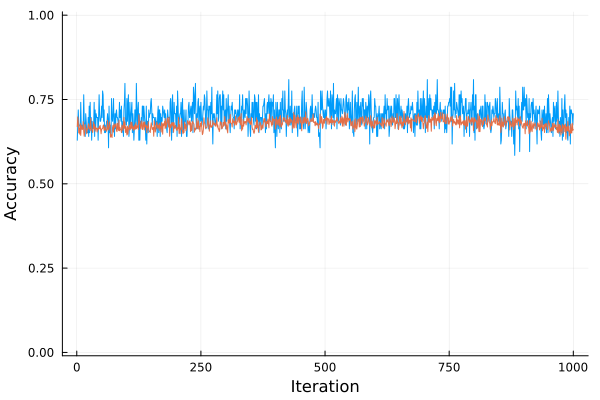

In [61]:
plot(acc_test, xlabel="Iteration", ylabel="Accuracy", label="", ylim=(-0.01, 1.01))
plot!(acc_train, label="", ylim=(-0.01, 1.01))

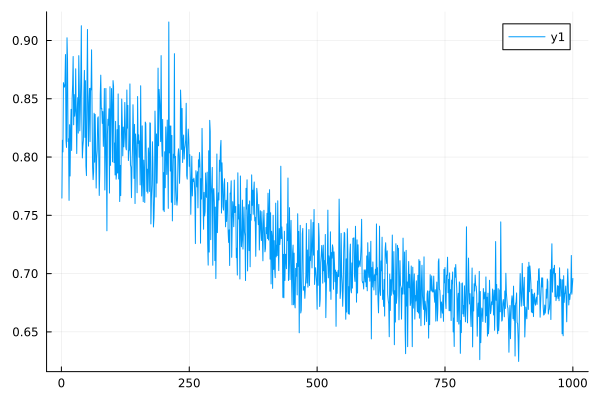

In [58]:
plot(Ls)

In [59]:
accuracy(my_network, X_dev, y_dev; dims=2)

0.6292134831460674

In [60]:
accuracy(my_network, X_train, y_train; dims=2)

0.614713216957606

## Test evaluation and comparing

### Logreg

In [42]:
X_test_std = standardize(X_test; dims=1)
X_log_test = hcat(X_test_std, ones(size(X_test, 1)))

418√ó18 Matrix{Float64}:
  0.387475   -0.498872  -0.399769  -0.49679   ‚Ä¶  -0.0489116  -0.0489116  1.0
  1.3527      0.616254  -0.399769  -0.511637     -0.0489116  -0.0489116  1.0
  2.51097    -0.498872  -0.399769  -0.463518     -0.0489116  -0.0489116  1.0
 -0.191659   -0.498872  -0.399769  -0.48187      -0.0489116  -0.0489116  1.0
 -0.577749    0.616254   0.619154  -0.416965     -0.0489116  -0.0489116  1.0
 -1.19549    -0.498872  -0.399769  -0.471799  ‚Ä¶  -0.0489116  -0.0489116  1.0
  0.0399944  -0.498872  -0.399769  -0.500371     -0.0489116  -0.0489116  1.0
 -0.268877    0.616254   0.619154  -0.117729     -0.0489116  -0.0489116  1.0
 -0.886621   -0.498872  -0.399769  -0.507533     -0.0489116  -0.0489116  1.0
 -0.654967    1.73138   -0.399769  -0.204568     -0.0489116  -0.0489116  1.0
  ‚ãÆ                                           ‚ã±   ‚ãÆ                      
 -2.04489     0.616254   0.619154  -0.390331     -0.0489116  -0.0489116  1.0
 -0.500531   -0.498872  -0.399769  -0.498208

In [43]:
test_preds_logreg = predict(X_log_test, w)

418-element BitVector:
 0
 0
 0
 0
 1
 0
 1
 0
 1
 0
 ‚ãÆ
 1
 1
 1
 1
 0
 1
 0
 0
 0

### NN

In [64]:
X_nn_test = standardize(X_test; dims=1)

418√ó17 Matrix{Float32}:
  0.387475   -0.498872  -0.399769  ‚Ä¶  -0.0692545  -0.0489116  -0.0489116
  1.3527      0.616254  -0.399769     -0.0692545  -0.0489116  -0.0489116
  2.51097    -0.498872  -0.399769     -0.0692545  -0.0489116  -0.0489116
 -0.191659   -0.498872  -0.399769     -0.0692545  -0.0489116  -0.0489116
 -0.577749    0.616254   0.619154     -0.0692545  -0.0489116  -0.0489116
 -1.19549    -0.498872  -0.399769  ‚Ä¶  -0.0692545  -0.0489116  -0.0489116
  0.0399944  -0.498872  -0.399769     -0.0692545  -0.0489116  -0.0489116
 -0.268877    0.616254   0.619154     -0.0692545  -0.0489116  -0.0489116
 -0.886621   -0.498872  -0.399769     -0.0692545  -0.0489116  -0.0489116
 -0.654967    1.73138   -0.399769     -0.0692545  -0.0489116  -0.0489116
  ‚ãÆ                                ‚ã±               ‚ãÆ          
 -2.04489     0.616254   0.619154     -0.0692545  -0.0489116  -0.0489116
 -0.500531   -0.498872  -0.399769  ‚Ä¶  -0.0692545  -0.0489116  -0.0489116
  0.58052     0.616254  

In [65]:
test_preds_nn = predict(X_nn_test', my_network; dims=2)

418-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ‚ãÆ
 0
 0
 0
 0
 0
 0
 0
 0
 0

### Comparison

logreg submission
<p align="center">
 <img src="../logreg_res.png"/>
</p>

nn submission

### Save

In [107]:
#save_my_submission(test_preds_nn, df_test.PassengerId)
save_my_submission(test_preds_logreg, df_test.PassengerId; file_path="../data/my_submission.csv")